In [12]:
import pandas as pd
import random

# Generate synthetic medical reviews related to pain experience
def generate_pain_reviews(num_reviews):
    reviews = []
    labels = []
    for _ in range(num_reviews):
        review = " ".join([random.choice(["I am in excruciating pain.", "The pain is unbearable.", "I can't stand the pain.", "The pain is intense.", "The pain is manageable.", "I am experiencing mild discomfort."])])
        label = random.choice(['negative', 'positive'])
        reviews.append(review)
        labels.append(label)
    return reviews, labels

# Define the number of reviews
num_reviews = 10000

# Generate synthetic reviews and labels related to pain experience
reviews, labels = generate_pain_reviews(num_reviews)

# Create a DataFrame
data = pd.DataFrame({'text': reviews, 'label': labels})

# Save the dataset to a CSV file
data.to_csv('synthetic_medical_pain_reviews.csv', index=False)


Accuracy (SVM): 0.5025
Accuracy (Logistic Regression): 0.5025


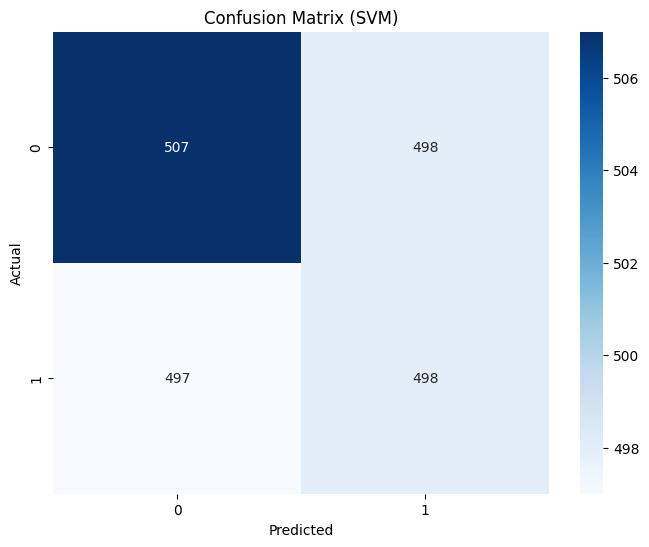

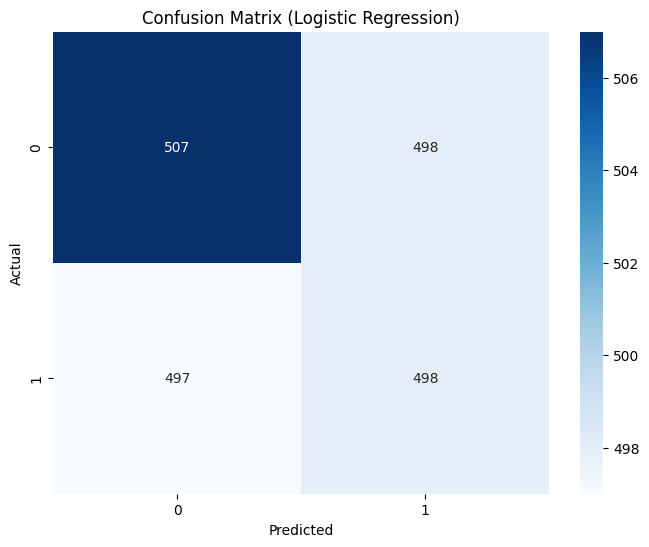

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('synthetic_medical_pain_reviews.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Support Vector Machine (SVM) model
svm_model = SVC(kernel = 'poly')
svm_model.fit(X_train, y_train)

# Make predictions on the test set using SVM
svm_pred = svm_model.predict(X_test)

# Calculate accuracy using SVM
svm_accuracy = accuracy_score(y_test, svm_pred)
print('Accuracy (SVM):', svm_accuracy)

# Train a Logistic Regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set using Logistic Regression
lr_pred = lr_model.predict(X_test)

# Calculate accuracy using Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
print('Accuracy (Logistic Regression):', lr_accuracy)

# Create a confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVM)')
plt.show()

# Create a confusion matrix for Logistic Regression
lr_cm = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Logistic Regression)')
plt.show()


# **Random Forrest**

Accuracy (Random Forest): 0.5025


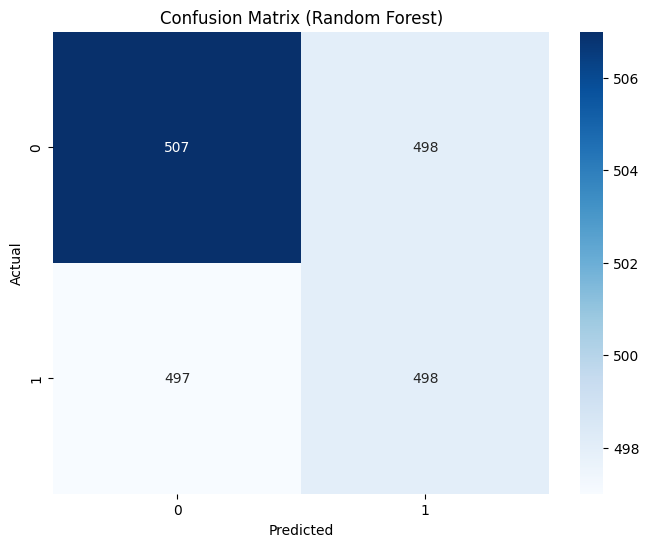

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('synthetic_medical_pain_reviews.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['label'], test_size=0.2, random_state=42)

# Convert text data into numerical features using TF-IDF
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, min_samples_leaf=2)
rf_model.fit(X_train, y_train)

# Make predictions on the test set using Random Forest
rf_pred = rf_model.predict(X_test)

# Calculate accuracy using Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
print('Accuracy (Random Forest):', rf_accuracy)

# Create a confusion matrix for Random Forest
rf_cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()
